In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib nbagg

In [3]:
def structData(fname):
    arr = np.loadtxt(fname)
    xi_ = arr[:,3]
    for j,xij in enumerate(xi_):
        if xij!=xi_[0]:
            break
    if j==len(xi_)-1:
        j +=1
    u__ = arr[:,-1].reshape(-1,j)
    xi_ = xi_.reshape(-1,j)[:,0]
    epos_ = arr[:j,:3]
    return xi_, u__, epos_

In [4]:
def USpecAnalysis(u_spec_, xi_, mode='t', tmin=0, tmax=1):
    """
    In t mode, show the integrand(t), t = xi/(1+xi) \in [0,1] by default
    In xi mode, show the integrand(xi), xi \in [0,+\infty) by default
    """
    if mode == 't':
        amin, amax = (tmin,tmax)
        a_ = xi_/(1+xi_)
    elif mode == 'xi':
        amin, amax = (tmin/(1-tmin), np.inf if tmax==1 else tmax/(1-tmax))
        a_ = xi_
    else:
        raise ValueError("Only Two options for `mode`: 't' or 'xi'. ")
    idx_ = np.logical_and(a_>=amin, a_<=amax)
    a_ = a_[idx_]
    u_spec_ = u_spec_[idx_]
    idx_ = np.argsort(a_)
    a_ = a_[idx_]
    u_spec_ = u_spec_[idx_]
    print("#Xi =", a_.size)
    if mode == 't':
        jac_ = ((1-a_)**(-2)).reshape(-1,1)
        u_spec_ *= jac_
    plt.plot(a_, u_spec_)
    plt.ylabel("Integrand (neV)")
    if mode == 't':
        plt.xlabel(r"$t = \frac{\xi/\omega_0}{1+\xi/\omega_0}$")
    else:
        plt.xlabel(r"$\xi/\omega_0$")
        plt.xscale('log')
    plt.subplots_adjust(left=0.16,right=0.99, top=0.99)
    return a_, u_spec_

In [5]:
def plotLateralCP(x_, pot_, n_units=1):
    xx = x_
    xx = np.concatenate((-xx[::-1],xx[:-1]))

    pot = pot_
    pot = np.concatenate((pot[::-1],pot[:-1]))

    if n_units>1:
        L = 2*epos_[-1,0]
        xx = np.concatenate(tuple([xx + L*j for j in range(n_units)]))
        pot = np.tile(pot, n_units)
    plt.plot(xx, pot)
    plt.xlabel("x/um")
    plt.ylabel("U/neV")
    plt.title("z=%.2f um , y=0"%(epos_[0,2]))

## PECPlate

<IPython.core.display.Javascript object>


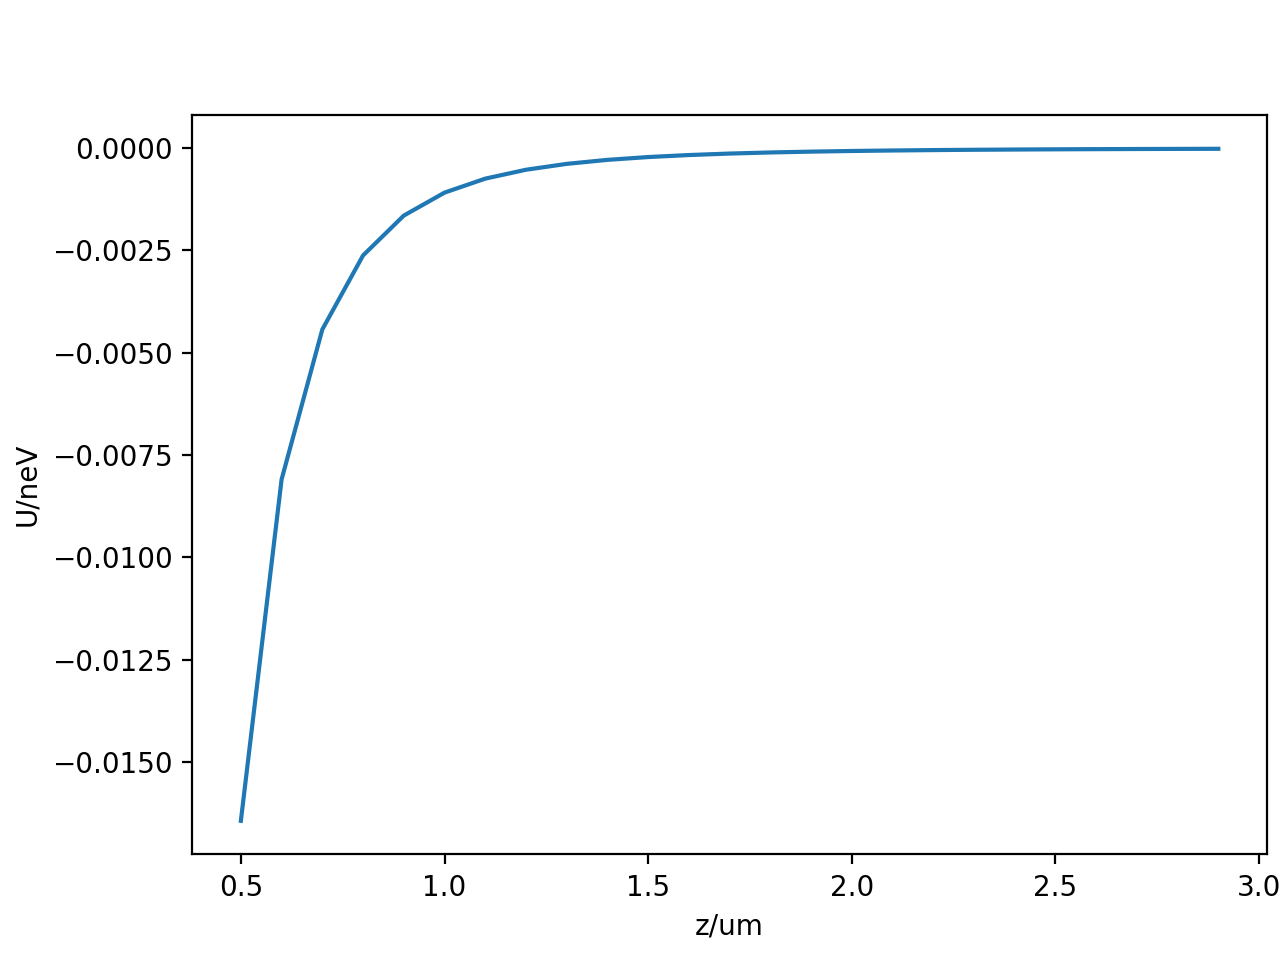

In [6]:
PECout =  np.loadtxt("analyticalDGF/PECPlate.out")
plt.plot(PECout[:,2], PECout[:,3])
plt.xlabel('z/um')
plt.ylabel('U/neV')
plt.subplots_adjust(right=0.99,left=0.15)

In [7]:
xi_, u__, epos_ = structData("analyticalDGF/PECPlate.byXi")

#Xi = 16


<IPython.core.display.Javascript object>


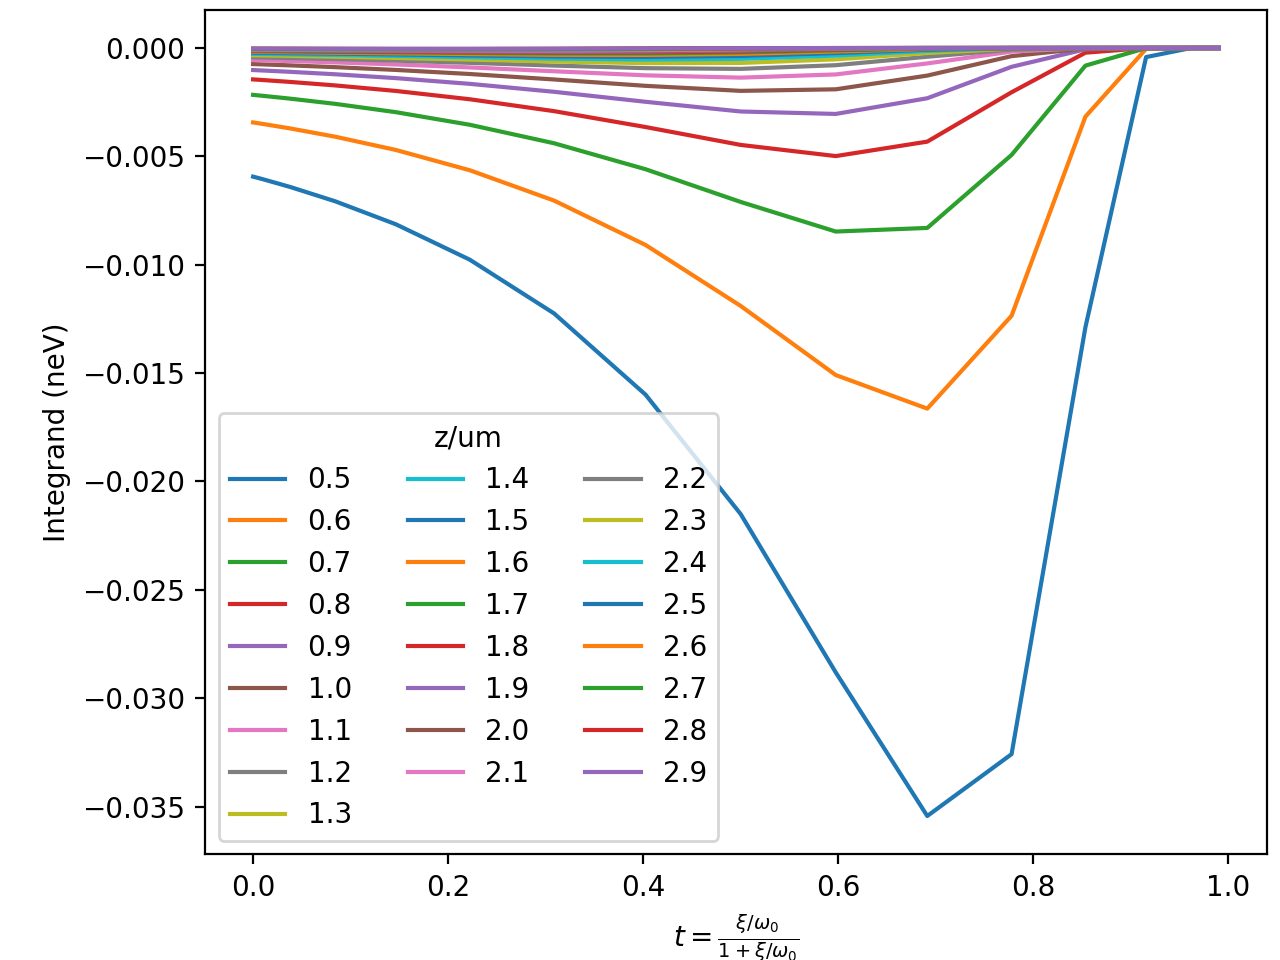

In [8]:
t_, u_spec = USpecAnalysis(u__, xi_)
plt.legend(epos_[:,2],title='z/um', ncol=3)

In [9]:
U_zscan = np.trapz(u_spec, t_,axis=0)

In [10]:
xi_, u__, epos_ = structData("L0P1_176/PECPlate_L0P1_176.byXi")

#Xi = 25


<IPython.core.display.Javascript object>


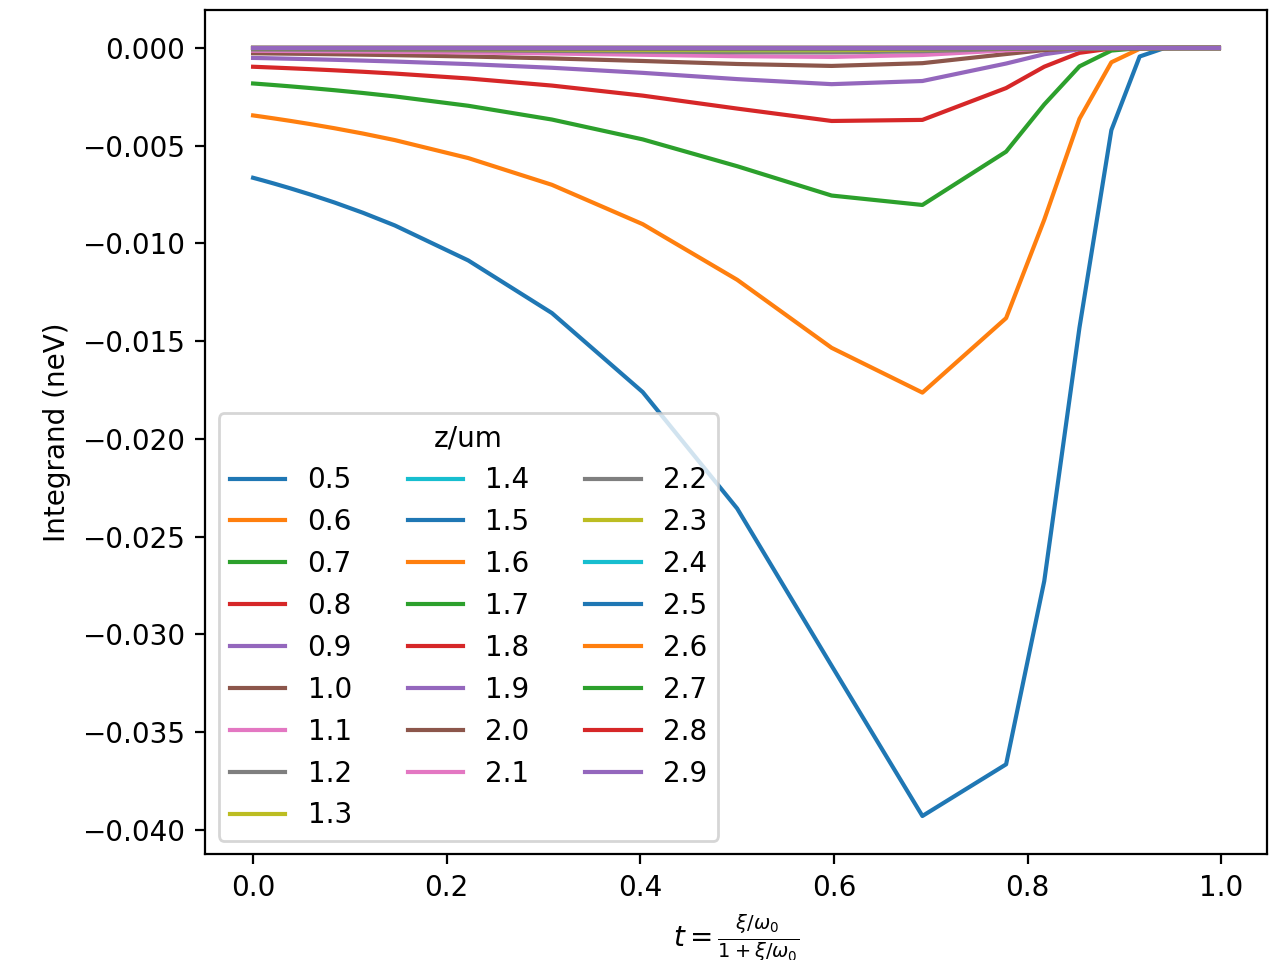

In [11]:
t_, u_spec = USpecAnalysis(u__[:,:], xi_)
plt.legend(epos_[:,2],title='z/um', ncol=3)

In [12]:
U_zscan_1 = np.trapz(u_spec, t_,axis=0)

<IPython.core.display.Javascript object>


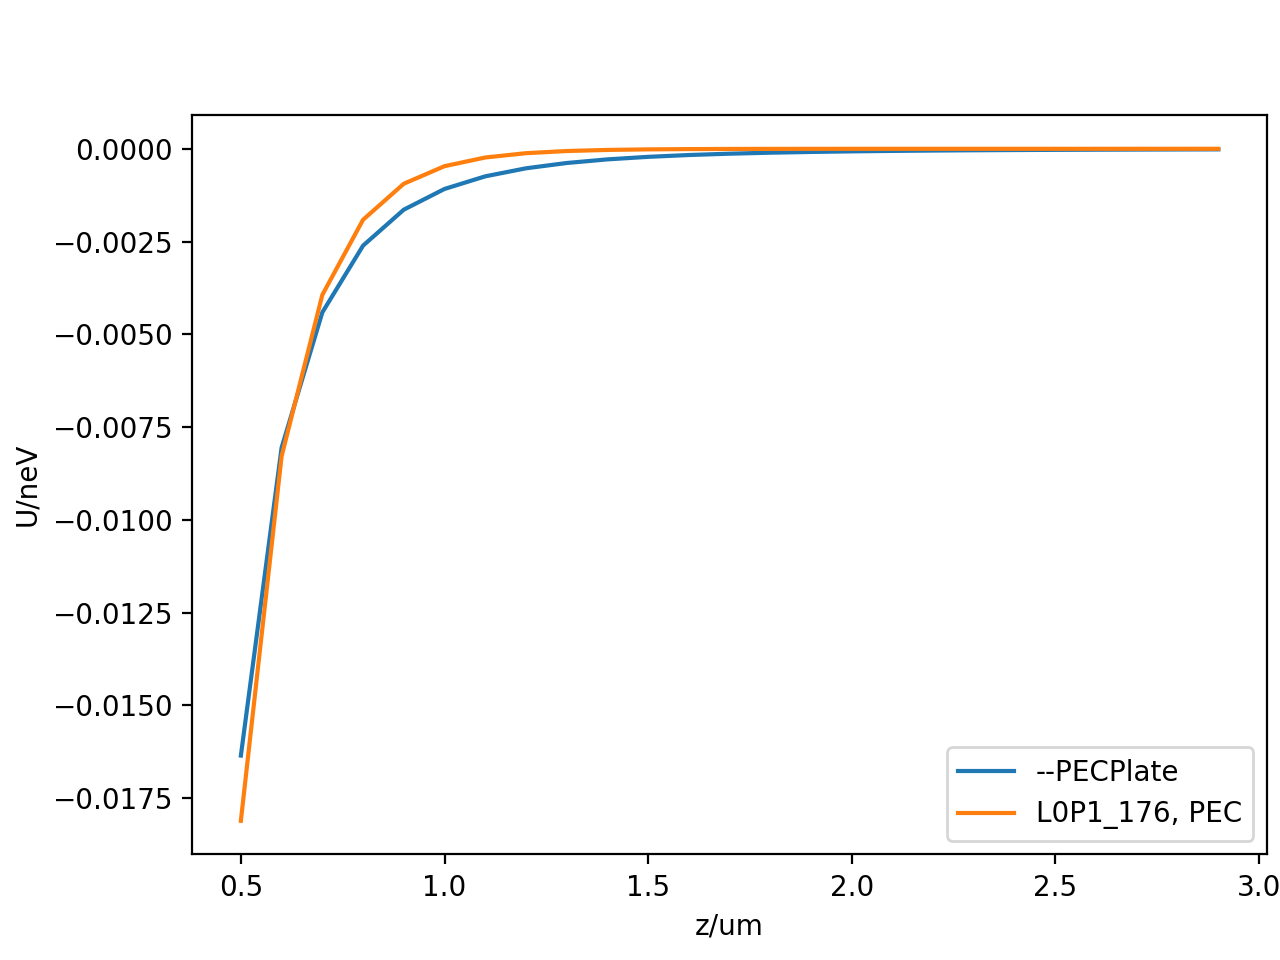

In [13]:
plt.plot(epos_[:,2], U_zscan, label="--PECPlate")
plt.plot(epos_[:,2], U_zscan_1, label="L0P1_176, PEC")
plt.xlabel('z/um')
plt.ylabel('U/neV')
plt.subplots_adjust(right=0.99,left=0.15)
plt.legend()

In [14]:
(U_zscan - U_zscan_1)/U_zscan

array([-0.10747415, -0.02844494,  0.10704381,  0.26734571,  0.42613476,
        0.5673211 ,  0.68392997,  0.77516807,  0.84364348,  0.89335687,
        0.92848145,  0.95274138,  0.96917729,  0.98012915,  0.98732208,
        0.99198659,  0.99497757,  0.99687628,  0.99807077,  0.99881612,
        0.99927779,  0.99956182,  0.99973548,  0.99984106,  0.99990492])

#Xi = 3


<IPython.core.display.Javascript object>


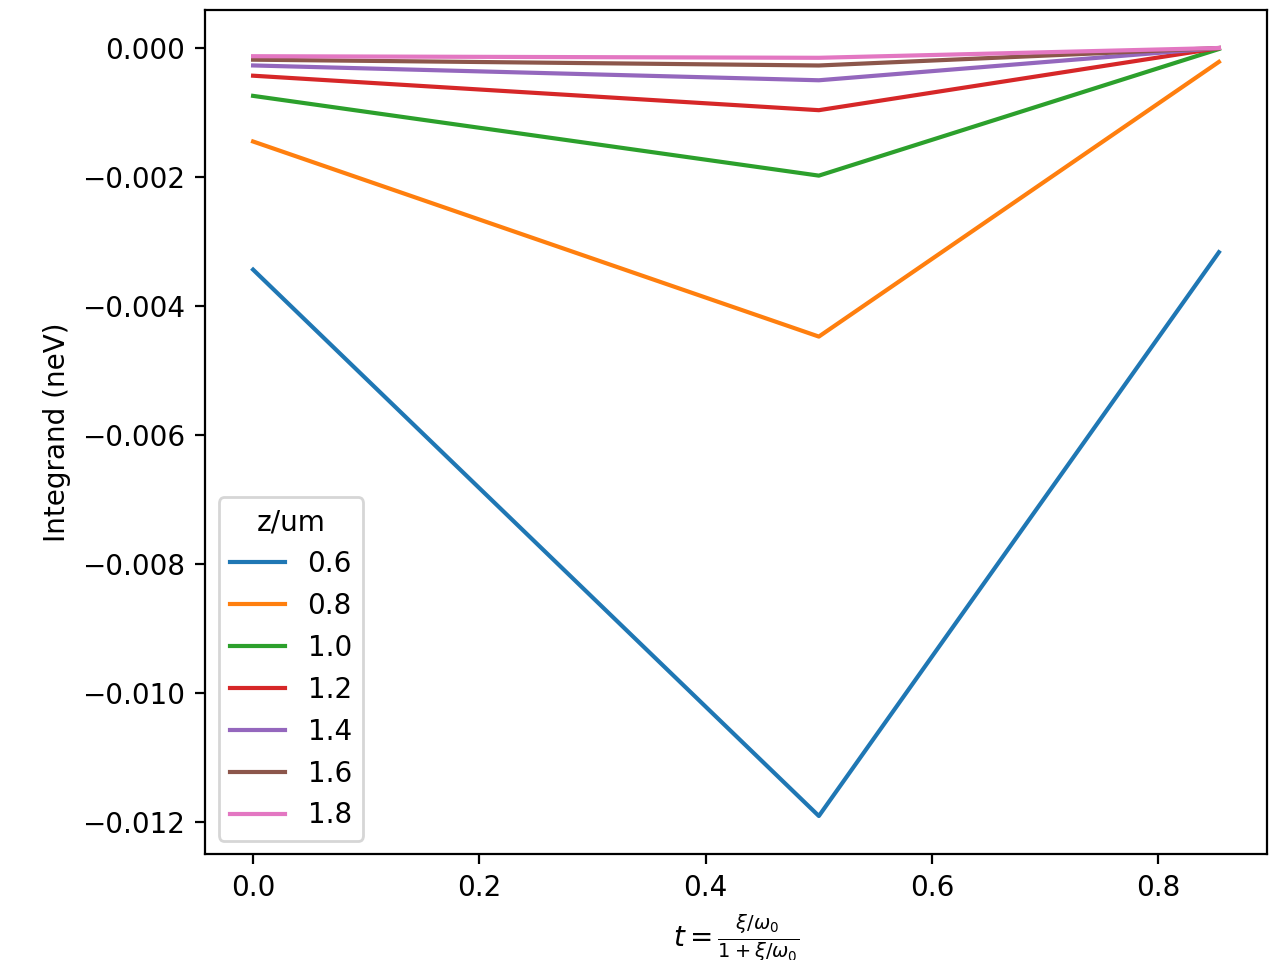

In [19]:
t_, u_spec = USpecAnalysis(u__[:3,1:15:2], xi_[:3])
plt.legend(epos_[1:15:2,2],title='z/um')

In [106]:
xi_, u__, epos_ = structData("L0P1_176/AuPlate_176_3111.byXi")

#Xi = 3


<IPython.core.display.Javascript object>


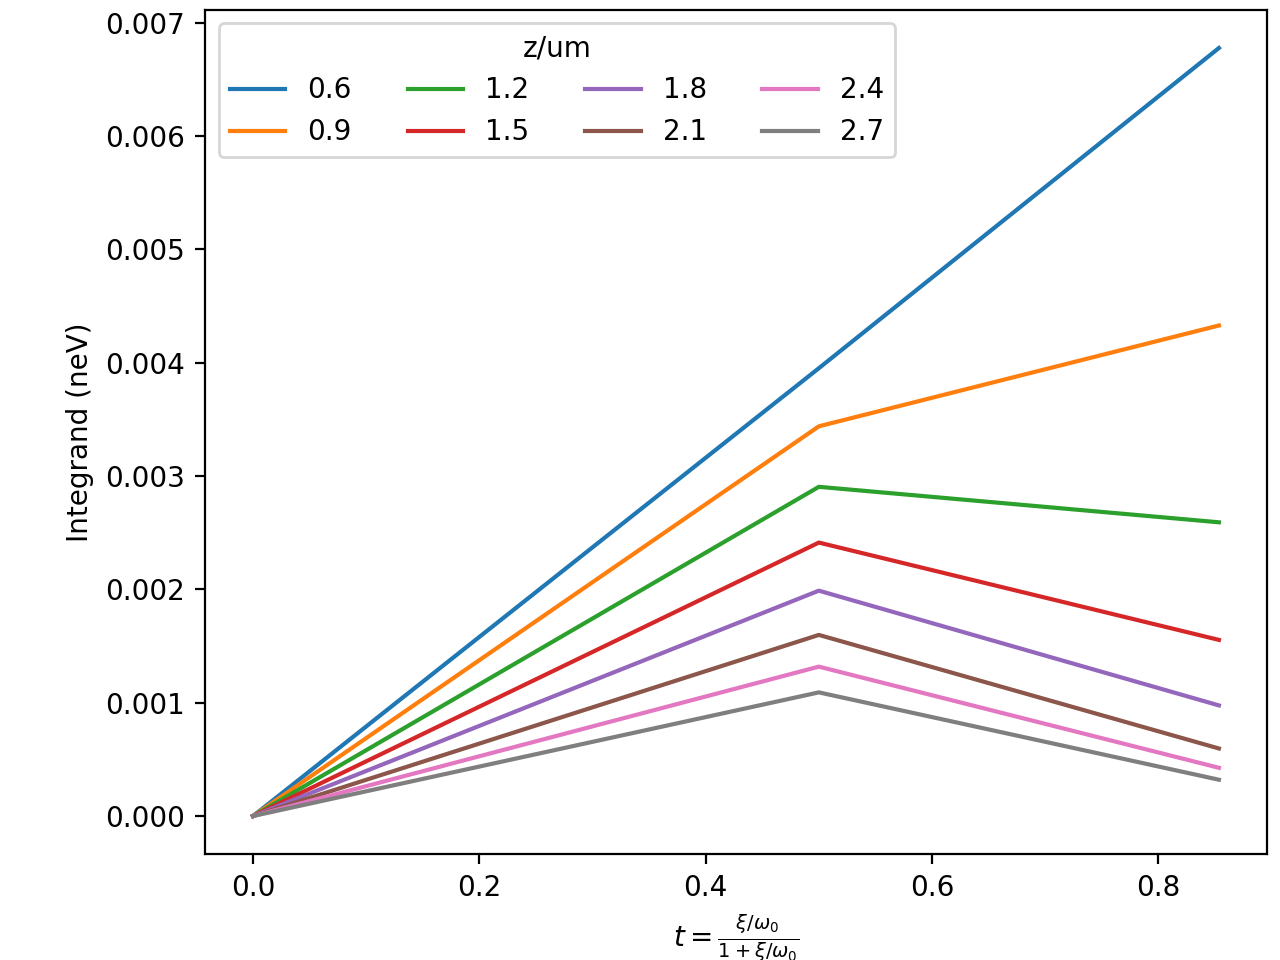

In [57]:
t_, u_spec = USpecAnalysis((u__[:,1::3]), xi_[:])
plt.legend(epos_[1::3,2],title='z/um',ncol=4)

In [101]:
xi_, u__, epos_ = structData("L0P1_176/AuPlate_176_TC25.byXi")

#Xi = 3


<IPython.core.display.Javascript object>


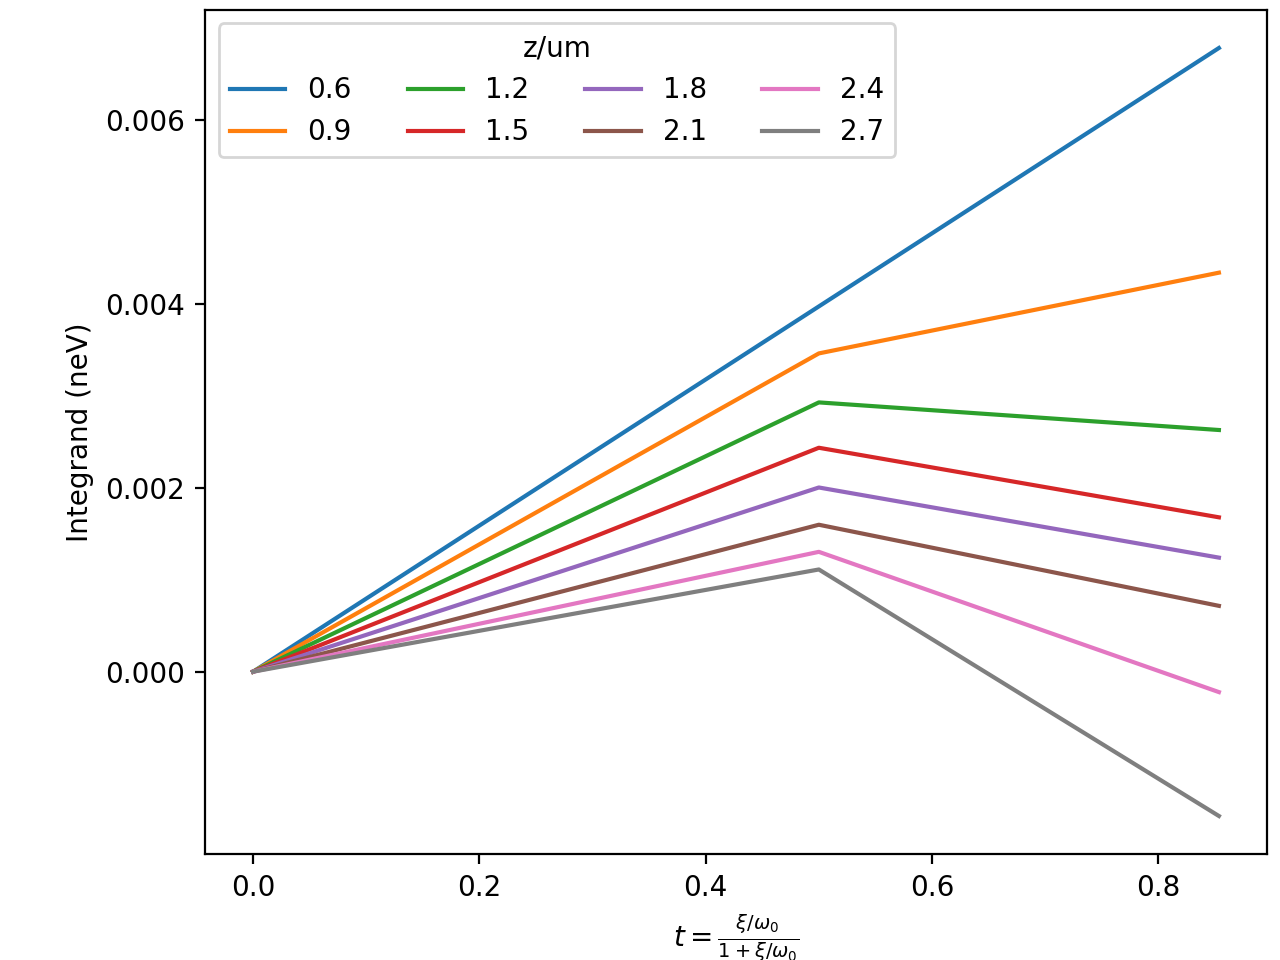

In [103]:
t_, u_spec = USpecAnalysis((u__[:,1::3]), xi_[:])
plt.legend(epos_[1::3,2],title='z/um',ncol=4)

### Sampling in BZ

In [80]:
polar3111 = np.loadtxt("L0P1_176/AuPlate_176_3111.byXikFile")[:,4:6].reshape(3,-1,25,2)[0,:,0,:]

In [86]:
TC25 = np.loadtxt("L0P1_176/AuPlate_176_TC25.byXikFile")[:,4:6].reshape(3,-1,25,2)[0,:,0,:]

<IPython.core.display.Javascript object>


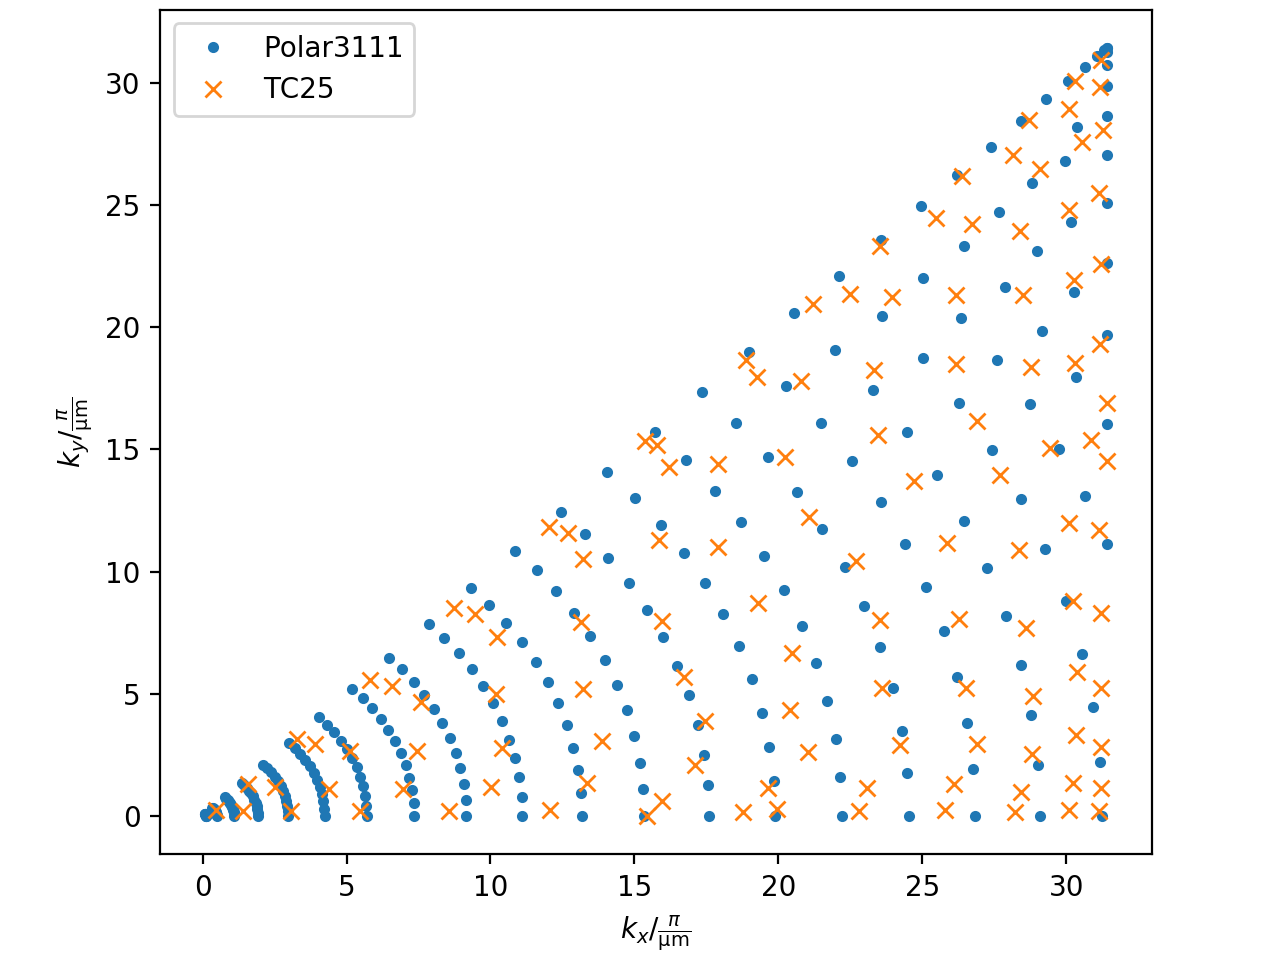

In [87]:
plt.plot(polar3111[:,0],polar3111[:,1],'.',label='Polar3111')
plt.plot(TC25[:,0], TC25[:,1],'x',label='TC25')
plt.xlabel(r'$k_x/\frac{\pi}{\mathrm{\mu m}}$')
plt.ylabel(r'$k_y/\frac{\pi}{\mathrm{\mu m}}$')
plt.subplots_adjust(top=0.99)

In [88]:
plt.legend()
plt.savefig("BZSampling.png")

In [96]:
xi_, u__, epos_ = structData("L0P1_736/AuPlate_736.byXi")

#Xi = 3


<IPython.core.display.Javascript object>


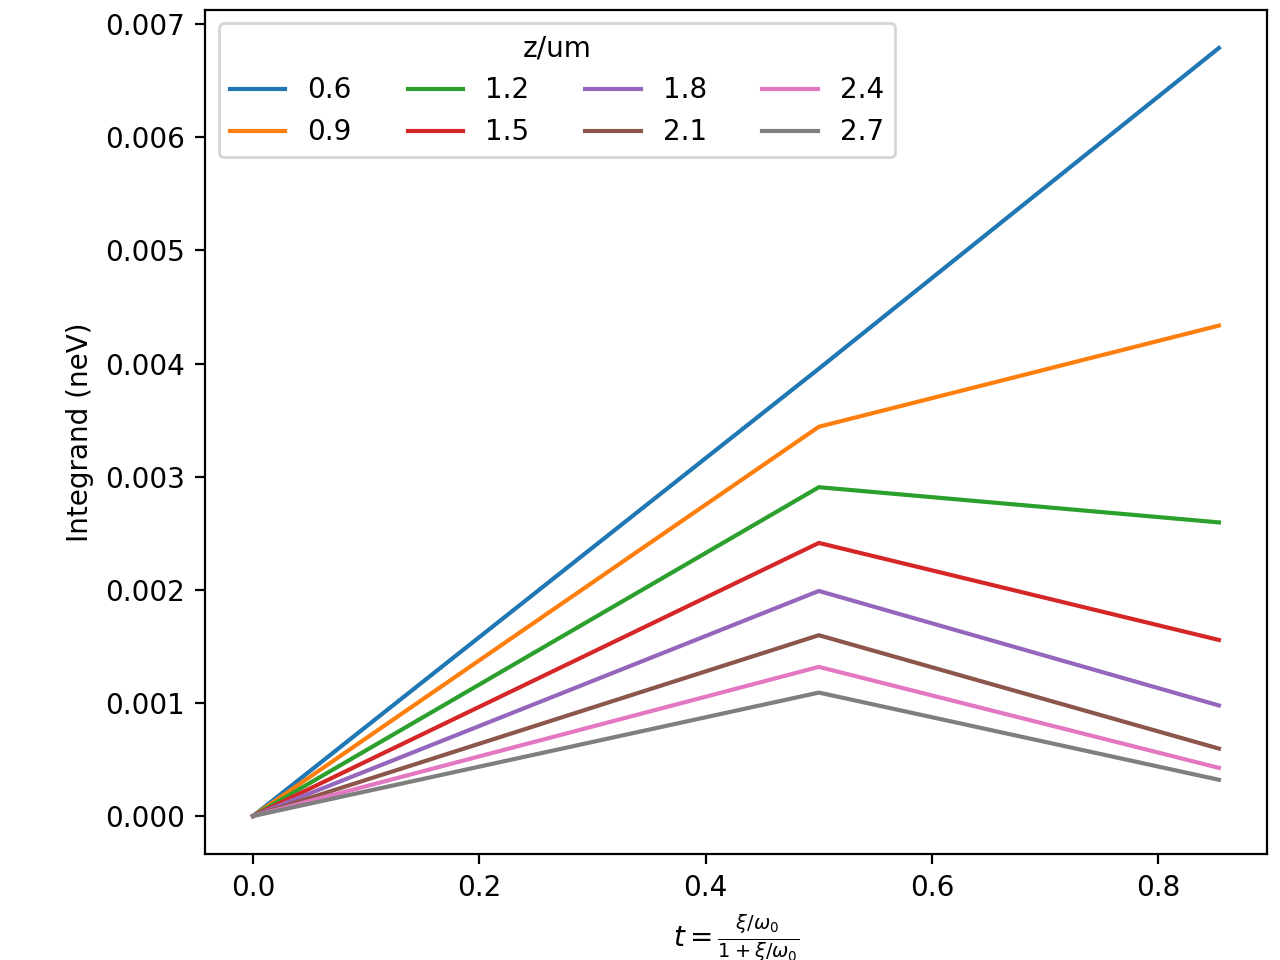

In [98]:
t_, u_spec = USpecAnalysis((u__[:,1::3]), xi_[:])
plt.legend(epos_[1::3,2],title='z/um',ncol=4)

In [129]:
xi_, u__, epos_ = structData("L0P1_176/AuPlate_176_TC20.byXi")

#Xi = 3


<IPython.core.display.Javascript object>


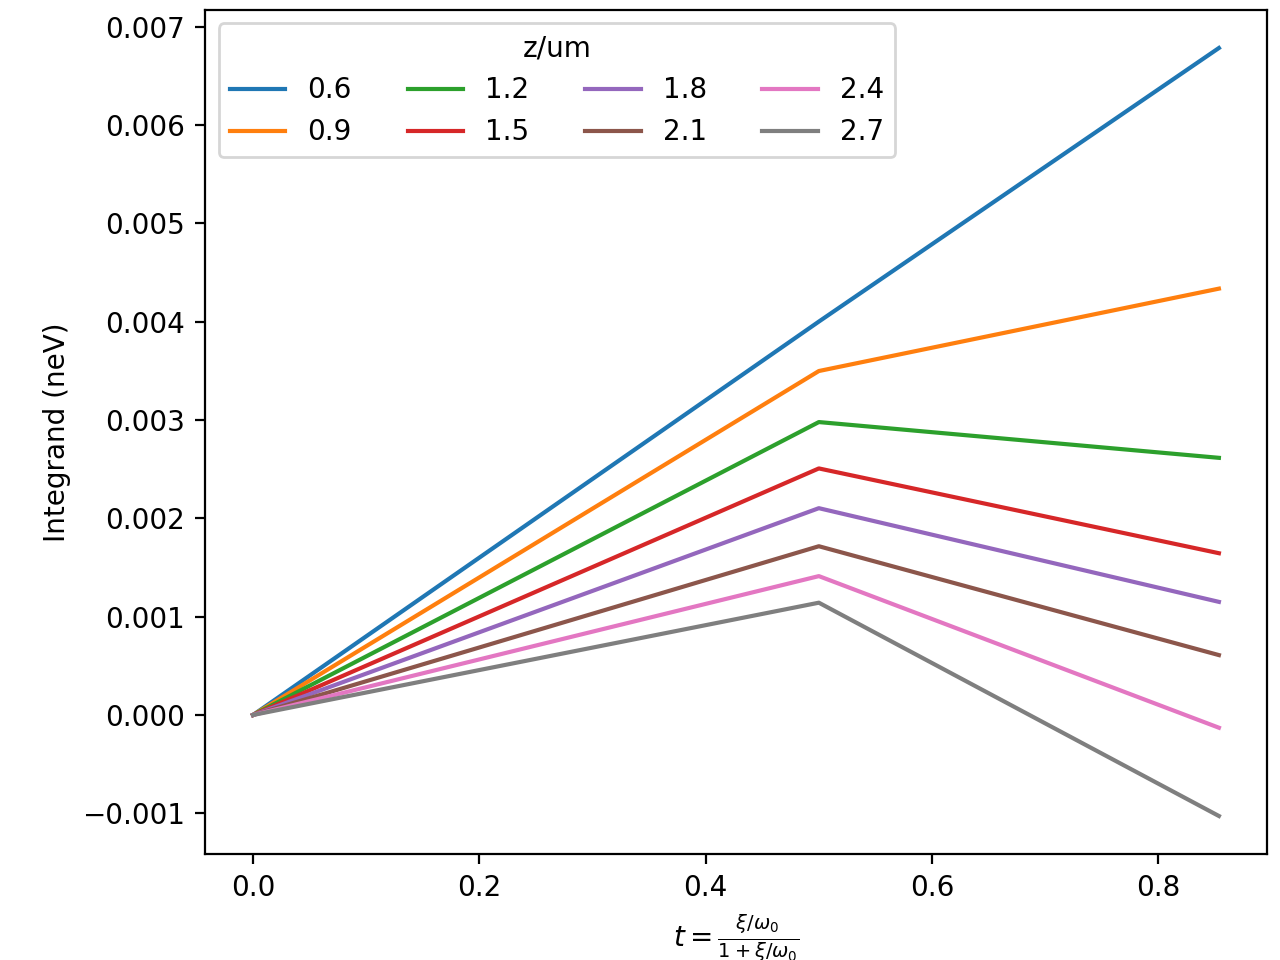

In [130]:
t_, u_spec = USpecAnalysis((u__[:,1::3]), xi_[:])
plt.legend(epos_[1::3,2],title='z/um',ncol=4)

In [108]:
xi_, u__, epos_ = structData("L0P1_176/AuPlate_176_TC14.byXi")

#Xi = 3


<IPython.core.display.Javascript object>


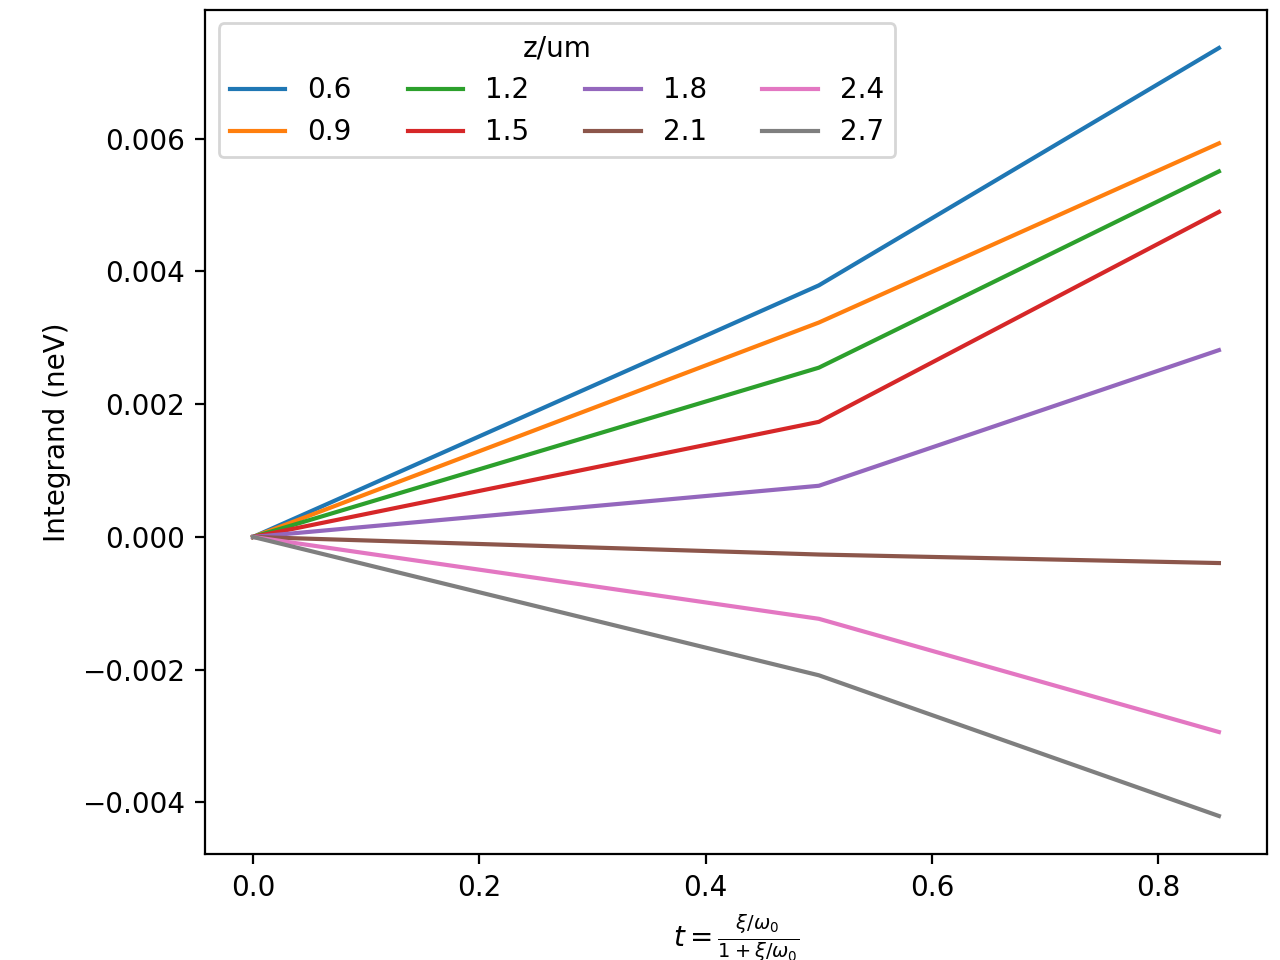

In [109]:
t_, u_spec = USpecAnalysis((u__[:,1::3]), xi_[:])
plt.legend(epos_[1::3,2],title='z/um',ncol=4)